# Project for Code Louisville Data Analytics 1 Course - History of Companies in Fortune 500

The purpose of this project is to study the historical trends in the Fortune 500. The Fortune 500 is a list of United States corporations ranked based on their revenue for a given fiscal year. The list first began in 1955, and has continued each year to the present day. Using data gathered since the list's inception, I was able to gain some insight into the history of the Fortune 500.

Primarily, this project was used as a way to learn and practice my coding skills. As I continue my education, I hope to return to this project to take a deeper look at the data and analyze it in more complex and interesting ways.

Sources:
Fortune 500 Historial Data: https://www.kaggle.com/datasets/darinhawley/fortune-500-companies-19552021
CPI Data: https://www.bls.gov/data/inflation_calculator.htm 


In [65]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Creating initial pandas dataframe

REQUIREMENT: Read in data - Read in data from a local csv

In [66]:
df = pd.read_csv('fortune500.csv')

First rows of the dataframe

In [67]:
df.head(12)

,Year,Name,Revenue,Rank
0,2021,Walmart,559151.0,1
1,2021,Amazon,386064.0,2
2,2021,Apple,274515.0,3
3,2021,CVS,268706.0,4
4,2021,UnitedHealth Group,257141.0,5
5,2021,Berkshire Hathaway,245510.0,6
6,2021,McKesson,231051.0,7
7,2021,AmerisourceBergen,189893.9,8
8,2021,Alphabet,182527.0,9
9,2021,Exxon Mobil,181502.0,10


Last rows of the dataframe

In [68]:
df.tail(12)

,Year,Name,Revenue,Rank
33488,1955,Consolidated Cigar,51.0,489
33489,1955,Langendorf United Bakeries,50.7,490
33490,1955,Truax-Traer Coal,50.5,491
33491,1955,Mansfield Tire & Rubber,50.4,492
33492,1955,Blue Bell,50.3,493
33493,1955,Warner-Lambert,50.3,494
33494,1955,Trane,50.2,495
33495,1955,Signal Oil Gas,50.2,496
33496,1955,Bullard,50.2,497
33497,1955,Cuban-American Sugar,50.1,498


Checking data types

In [69]:
df.dtypes

Year         int64
Name        object
Revenue    float64
Rank         int64
dtype: object

Checking to make sure all data is present.
Since there are 67 years from 1955 to 2021, and 500 entries per year, there should be 33500 total rows.

REQUIREMENT: Analyze your data (1/5) - Use at least 5 different built-in
Python functions to find out something about your data

In [70]:
len(df.index)

33500

Creating a limited data frame that contains data on only companies ranked 1-10 each year.

REQUIREMENT: Manipulate and clean your data - Use built-in pandas or numpy functions

In [71]:
top10 = df.loc[df['Rank'] <= 10]

First rows of "Top 10" dataframe

In [72]:
top10.head(12)

,Year,Name,Revenue,Rank
0,2021,Walmart,559151.0,1
1,2021,Amazon,386064.0,2
2,2021,Apple,274515.0,3
3,2021,CVS,268706.0,4
4,2021,UnitedHealth Group,257141.0,5
5,2021,Berkshire Hathaway,245510.0,6
6,2021,McKesson,231051.0,7
7,2021,AmerisourceBergen,189893.9,8
8,2021,Alphabet,182527.0,9
9,2021,Exxon Mobil,181502.0,10


Last rows of "Top 10" dataframe

In [73]:
top10.tail(12)

,Year,Name,Revenue,Rank
32508,1956,Armour,1967.7,9
32509,1956,DuPont,1909.2,10
33000,1955,General Motors,9823.5,1
33001,1955,Exxon Mobil,5661.4,2
33002,1955,U.S. Steel,3250.4,3
33003,1955,General Electric,2959.1,4
33004,1955,Esmark,2510.8,5
33005,1955,Chrysler,2071.6,6
33006,1955,Armour,2056.1,7
33007,1955,Gulf Oil,1705.3,8


Determining which companies have ever appeared in the Top 10 list, and how many times each has appeared.

REQUIREMENT: Analyze your data (2/5) - Do 5 basic calculations with Pandas

In [74]:
top10_count = pd.Series.to_frame(top10['Name'].value_counts())
print(top10_count)

                    Name
Exxon Mobil           67
General Motors        63
Ford Motor            62
General Electric      59
Mobil                 43
IBM                   42
Texaco                36
Chevron               29
AT&T                  28
Chrysler              28
Walmart               27
Gulf Oil              25
U.S. Steel            15
DuPont                14
Altria Group          13
Berkshire Hathaway    11
Citigroup             10
Conoco                 9
Apple                  9
Esmark                 8
CVS                    7
Amoco                  6
UnitedHealth Group     6
McKesson               6
ITT                    6
AIG                    5
Bank of America        4
Amazon                 4
Valero Energy          3
AmerisourceBergen      3
Hewlett-Packard        3
Phillips 66            3
Bethlehem Steel        2
Armour                 2
Boeing                 2
Enron                  2
Verizon                2
Fannie Mae             2
Sears                  1


Number of appearances in the Top 10 displayed graphically.

This data demonstrates that only a few companies have ever reached the highest ranks of the Fortune 500. 

REQUIREMENT: Visualize your data (1/2) - Make 2 basic plots with
matplotlib

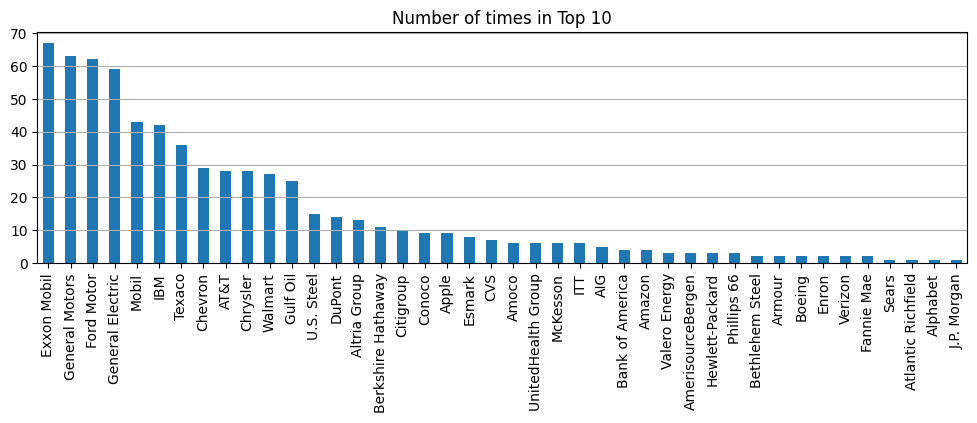

In [92]:
top10_count.plot(kind = 'bar', figsize = (12,3), legend = None)
plt.title('Number of times in Top 10')
plt.grid(axis = 'y')
plt.show()

Determining the mean revenue of all Fortune 500 companies for each year

REQUIREMENT: Analyze your data (3/5) - Do 5 basic calculations with Pandas

In [76]:
mean500 = df.groupby('Year')['Revenue'].mean()
print(mean500)


Year
1955      273.5660
1956      322.7970
1957      348.6130
1958      376.6244
1959      353.6618
           ...    
2017    24111.7480
2018    25628.9520
2019    27442.6194
2020    28420.2092
2021    27526.1534
Name: Revenue, Length: 67, dtype: float64


Annual mean displayed graphically

REQUIREMENT: Visualize your data (2/2) - Make 2 basic plots with matplotlib

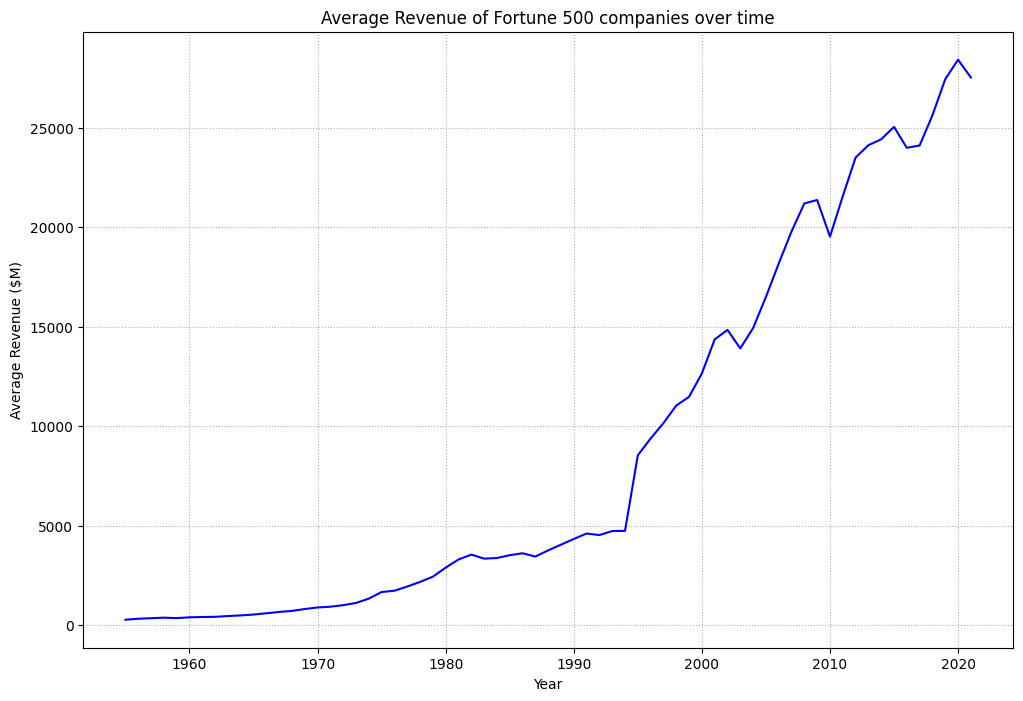

In [77]:

plt.figure(figsize = (12,8))
plt.plot(mean500, color = 'blue')
plt.title('Average Revenue of Fortune 500 companies over time')
plt.xlabel('Year')
plt.ylabel('Average Revenue ($M)')
plt.grid(linestyle = ':')
plt.show()

Creating dataframe containing the rank 1 company for each year

In [78]:
number1 = df.loc[df['Rank'] == 1].reset_index()

The "Number 1" dataframe. Shows the rank 1 company each year, as well as their revenue.

In [79]:
print(number1)

    index  Year            Name   Revenue  Rank
0       0  2021         Walmart  559151.0     1
1     500  2020         Walmart  523964.0     1
2    1000  2019         Walmart  514405.0     1
3    1500  2018         Walmart  500343.0     1
4    2000  2017         Walmart  485873.0     1
..    ...   ...             ...       ...   ...
62  31000  1959  General Motors    9522.0     1
63  31500  1958  General Motors   10989.8     1
64  32000  1957  General Motors   10796.4     1
65  32500  1956  General Motors   12443.3     1
66  33000  1955  General Motors    9823.5     1

[67 rows x 5 columns]


Determining which companies have reached Rank 1 in the Fortune 500, and how many times.

Only 3 companies have ever held the top rank in the Fortune 500 since the list's inception in 1955: General Motors, Walmart, and Exxon Mobil.

REQUIREMENT: Analyze your data (4/5) - Do 5 basic calculations with Pandas

In [80]:
number1_count = (number1['Name'].value_counts())
print(number1_count)

General Motors    37
Walmart           17
Exxon Mobil       13
Name: Name, dtype: int64


Creating individual data for each of the 3 companies. This will be used in the following graphs.

In [81]:
GM1 = number1.loc[number1['Name'] == 'General Motors']
EM1 = number1.loc[number1['Name'] == 'Exxon Mobil']
WM1 = number1.loc[number1['Name'] == 'Walmart']


Graph showing the revenue of the Rank 1 company each year, as well as which company was ranked number 1. 

It can clearly be seen that General Motors was the company with the highest revenue for most of the list's early years, while Walmart has been more successful more recently. Exxon Mobil has also reached the number 1 rank multiple years throughout the history of the Fortune 500, but not for a long a period.

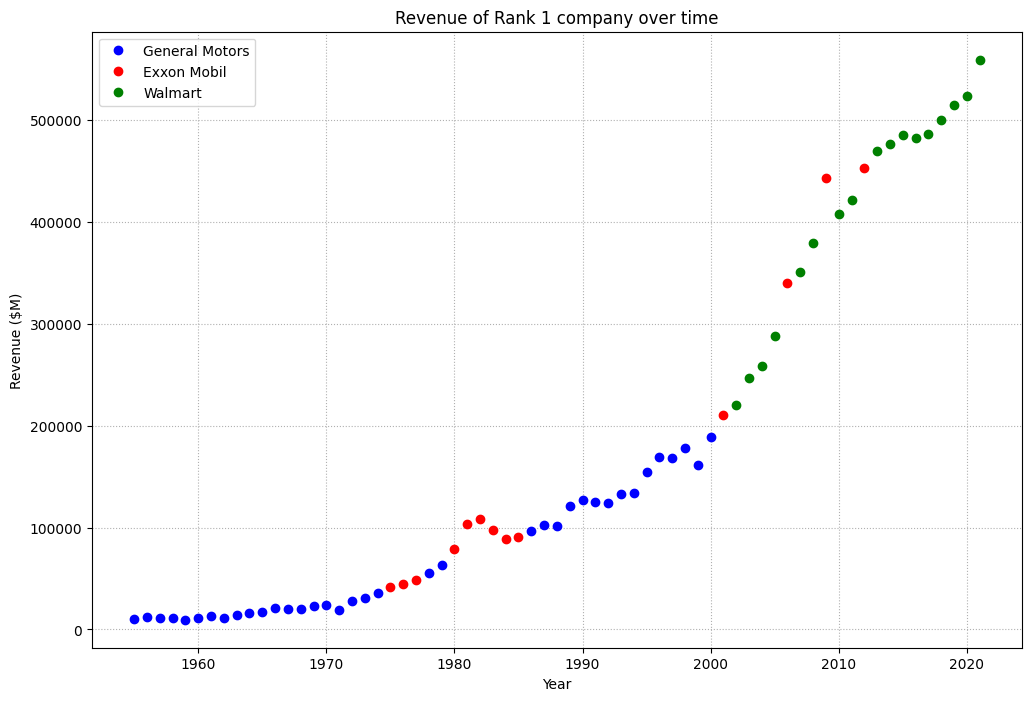

In [82]:
plt.figure(figsize = (12,8))
plt.plot(GM1['Year'], GM1['Revenue'], 'o', color = 'blue', label = 'General Motors')
plt.plot(EM1['Year'], EM1['Revenue'], 'o', color = 'red', label = 'Exxon Mobil')
plt.plot(WM1['Year'], WM1['Revenue'], 'o', color = 'green', label = 'Walmart')
plt.title('Revenue of Rank 1 company over time')
plt.xlabel('Year')
plt.ylabel('Revenue ($M)')
plt.grid(linestyle = ':')
plt.legend()
plt.show()



Creating a column to determine purchasing power in a given year relative to 2021, based on average consumer price index.
The formula is: purchasing power = ([cpi of ending year]/[cpi of beginning year]) * price
For example: cpi in 1955 = 26.8; cpi in 2021 = 270.970 
270.970/26.8 = 10.11; 10.11*$5 = $50.55
So, $5 in 1955 has approximately the purchasing power of $50.55 in 2021

Data acquired from the Department on Labor Satistics

REQUIREMENT: Manipulate and clean your data - Use custom functions or
lambdas to perform specific operations to clean or manipulate your data, return those values, then use them in other parts of your project.

In [83]:
cpi = pd.read_csv("cpi.csv", index_col=0)

cpi["purchasing_power"] = cpi["cpi"].apply(lambda x: (270.970/x))

Dataframe containing the purchasing power in a given year realative to 2021

In [84]:
print(cpi)

          cpi  purchasing_power
Year                           
1955   26.800         10.110821
1956   27.200          9.962132
1957   28.100          9.643060
1958   28.900          9.376125
1959   29.100          9.311684
...       ...               ...
2017  245.120          1.105459
2018  251.107          1.079102
2019  255.657          1.059897
2020  258.811          1.046980
2021  270.970          1.000000

[67 rows x 2 columns]


Combining the cpi dataframe with the initial Fortune 500 dataframe.

In [85]:
df2 = cpi.join(df.set_index("Year"))
print(df2)

         cpi  purchasing_power                    Name  Revenue  Rank
Year                                                                 
1955   26.80         10.110821          General Motors   9823.5     1
1955   26.80         10.110821             Exxon Mobil   5661.4     2
1955   26.80         10.110821              U.S. Steel   3250.4     3
1955   26.80         10.110821        General Electric   2959.1     4
1955   26.80         10.110821                  Esmark   2510.8     5
...      ...               ...                     ...      ...   ...
2021  270.97          1.000000  Camping World Holdings   5446.6   496
2021  270.97          1.000000                  NetApp   5412.0   497
2021  270.97          1.000000       Avis Budget Group   5402.0   498
2021  270.97          1.000000   R.R. Donnelley & Sons   5398.8   499
2021  270.97          1.000000                 Moody's   5371.0   500

[33500 rows x 5 columns]


Calculating the revenue of each entry in the historial data realative to 2021 based on inflation.

REQUIREMENT: Analyze your data (5/5) - Do 5 basic calculations with Pandas

In [93]:
df2["adjusted_revenue"] = (df2["Revenue"] * df2["purchasing_power"])

First entries of the data, now with adjusted revenue

In [94]:
df2.head()

,cpi,purchasing_power,Name,Revenue,Rank,adjusted_revenue
Year,,,,,,
1955,26.8,10.110821,General Motors,9823.5,1,99323.649067
1955,26.8,10.110821,Exxon Mobil,5661.4,2,57241.401418
1955,26.8,10.110821,U.S. Steel,3250.4,3,32864.212239
1955,26.8,10.110821,General Electric,2959.1,4,29918.930112
1955,26.8,10.110821,Esmark,2510.8,5,25386.249104


Last entries of the data, now with adjusted revenue

In [87]:
df2.tail()

,cpi,purchasing_power,Name,Revenue,Rank,adjusted_revenue
Year,,,,,,
2021,270.97,1.0,Camping World Holdings,5446.6,496,5446.6
2021,270.97,1.0,NetApp,5412.0,497,5412.0
2021,270.97,1.0,Avis Budget Group,5402.0,498,5402.0
2021,270.97,1.0,R.R. Donnelley & Sons,5398.8,499,5398.8
2021,270.97,1.0,Moody's,5371.0,500,5371.0


Creating dataframe containing the rank 1 company for each year, with their revenue adjusted for inflation.

In [88]:
adj = df2.loc[df2['Rank'] == 1].reset_index()
adj1 = adj[['Year', 'Name', 'adjusted_revenue']]
print(adj1)

    Year            Name  adjusted_revenue
0   1955  General Motors      99323.649067
1   1956  General Motors     123961.801507
2   1957  General Motors     104110.338363
3   1958  General Motors     103041.733772
4   1959  General Motors      88665.853608
..   ...             ...               ...
62  2017         Walmart     537112.462508
63  2018         Walmart     539921.000649
64  2019         Walmart     545216.140571
65  2020         Walmart     548579.948611
66  2021         Walmart     559151.000000

[67 rows x 3 columns]


Creating individual data for each of the Rank 1 companies. This will be used in the following graphs.

In [89]:
GM2 = adj1.loc[adj1['Name'] == 'General Motors']
EM2 = adj1.loc[adj1['Name'] == 'Exxon Mobil']
WM2 = adj1.loc[adj1['Name'] == 'Walmart']

Graph showing the revenue of the Rank 1 company each year, adjusted for inflation, as well as which compnay was ranked number 1. 

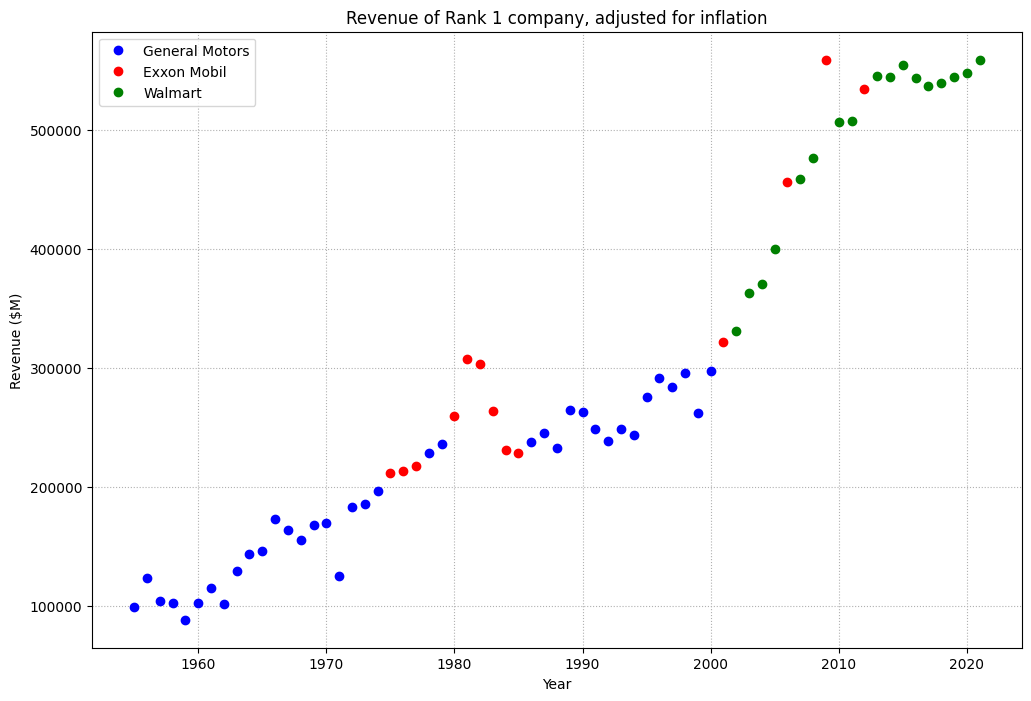

In [90]:
plt.figure(figsize = (12,8))
plt.plot(GM2['Year'], GM2['adjusted_revenue'], 'o', color = 'blue', label = 'General Motors')
plt.plot(EM2['Year'], EM2['adjusted_revenue'], 'o', color = 'red', label = 'Exxon Mobil')
plt.plot(WM2['Year'], WM2['adjusted_revenue'], 'o', color = 'green', label = 'Walmart')
plt.title('Revenue of Rank 1 company, adjusted for inflation')
plt.xlabel('Year')
plt.ylabel('Revenue ($M)')
plt.grid(linestyle = ':')
plt.legend()
plt.show()

Graph comparing the revenue of the Rank 1 companies to their revenues adjusted for inflation.

It can be seen how the growth is much less stable after adjusting for inflation, even as the trend towards growth stays relatively the same.

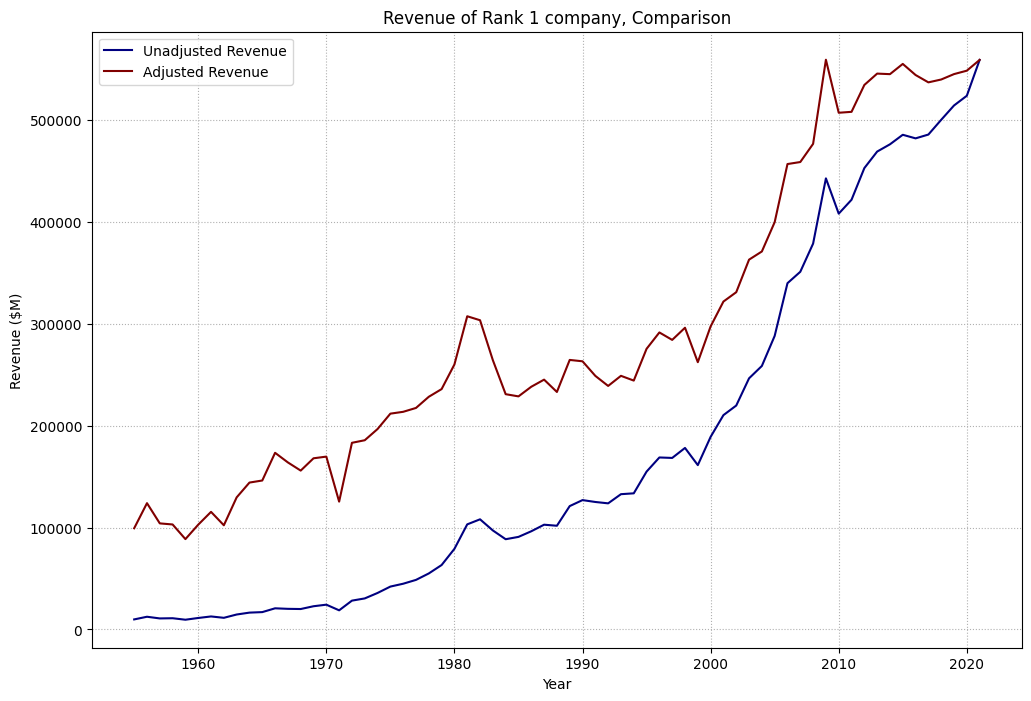

In [91]:
plt.figure(figsize = (12,8))
plt.plot(number1['Year'], number1['Revenue'], color = 'navy', label = 'Unadjusted Revenue' )
plt.plot(adj1['Year'], adj1['adjusted_revenue'], color = 'maroon', label = 'Adjusted Revenue')
plt.title('Revenue of Rank 1 company, Comparison')
plt.xlabel('Year')
plt.ylabel('Revenue ($M)')
plt.grid(linestyle = ':')
plt.legend()
plt.show()